A teaser for the new upcoming diffenrentation mode called 'adjoint' in qadence.

It's an implementation of algorithm 1 in the paper "EFFICIENT CALCULATION OF GRADIENTS IN CLASSICAL SIMULATIONS OF VARIATIONAL QUANTUM ALGORITHMS" by Tyson, Gacon,2020 (https://arxiv.org/pdf/2009.02823.pdf).

Quick facts:
1. A memory-efficient alternative to the differentation mode "ad"
2. Not runnable on hardware
3. Only available for the pyqtorch backend.
4. Only first-order supported for now. Soon!
5. No support (yet) for parametric/multiple observables. Soon!

How do i use it?

In [8]:
from qadence import hea, DiffMode, QNN, QuantumCircuit, BackendName,total_magnetization

diff_mode = DiffMode.ADJOINT
# or
diff_mode = 'adjoint'

n_qubits = 4
circ = QuantumCircuit(n_qubits, hea(n_qubits, depth=2))
backend= BackendName.PYQTORCH
obs = total_magnetization(n_qubits)
model = QNN(circ, obs, backend=backend, diff_mode=diff_mode)

/Users/seitzdom/Library/Application Support/hatch/env/virtual/extremal-learning/aC_C9bmz/extremal-learning/lib/python3.10/site-packages/qadence/constructors/hamiltonians.py:255: FutureWarning: This function will be removed in the future. Please use `hamiltonian_factory(n_qubits, detuning=Z, node_coeff=z_terms)`.
  warnings.warn(message, FutureWarning)


No higher order derivatives?
So what can I use it for at the moment?

Solve the maxcut problem, for example.

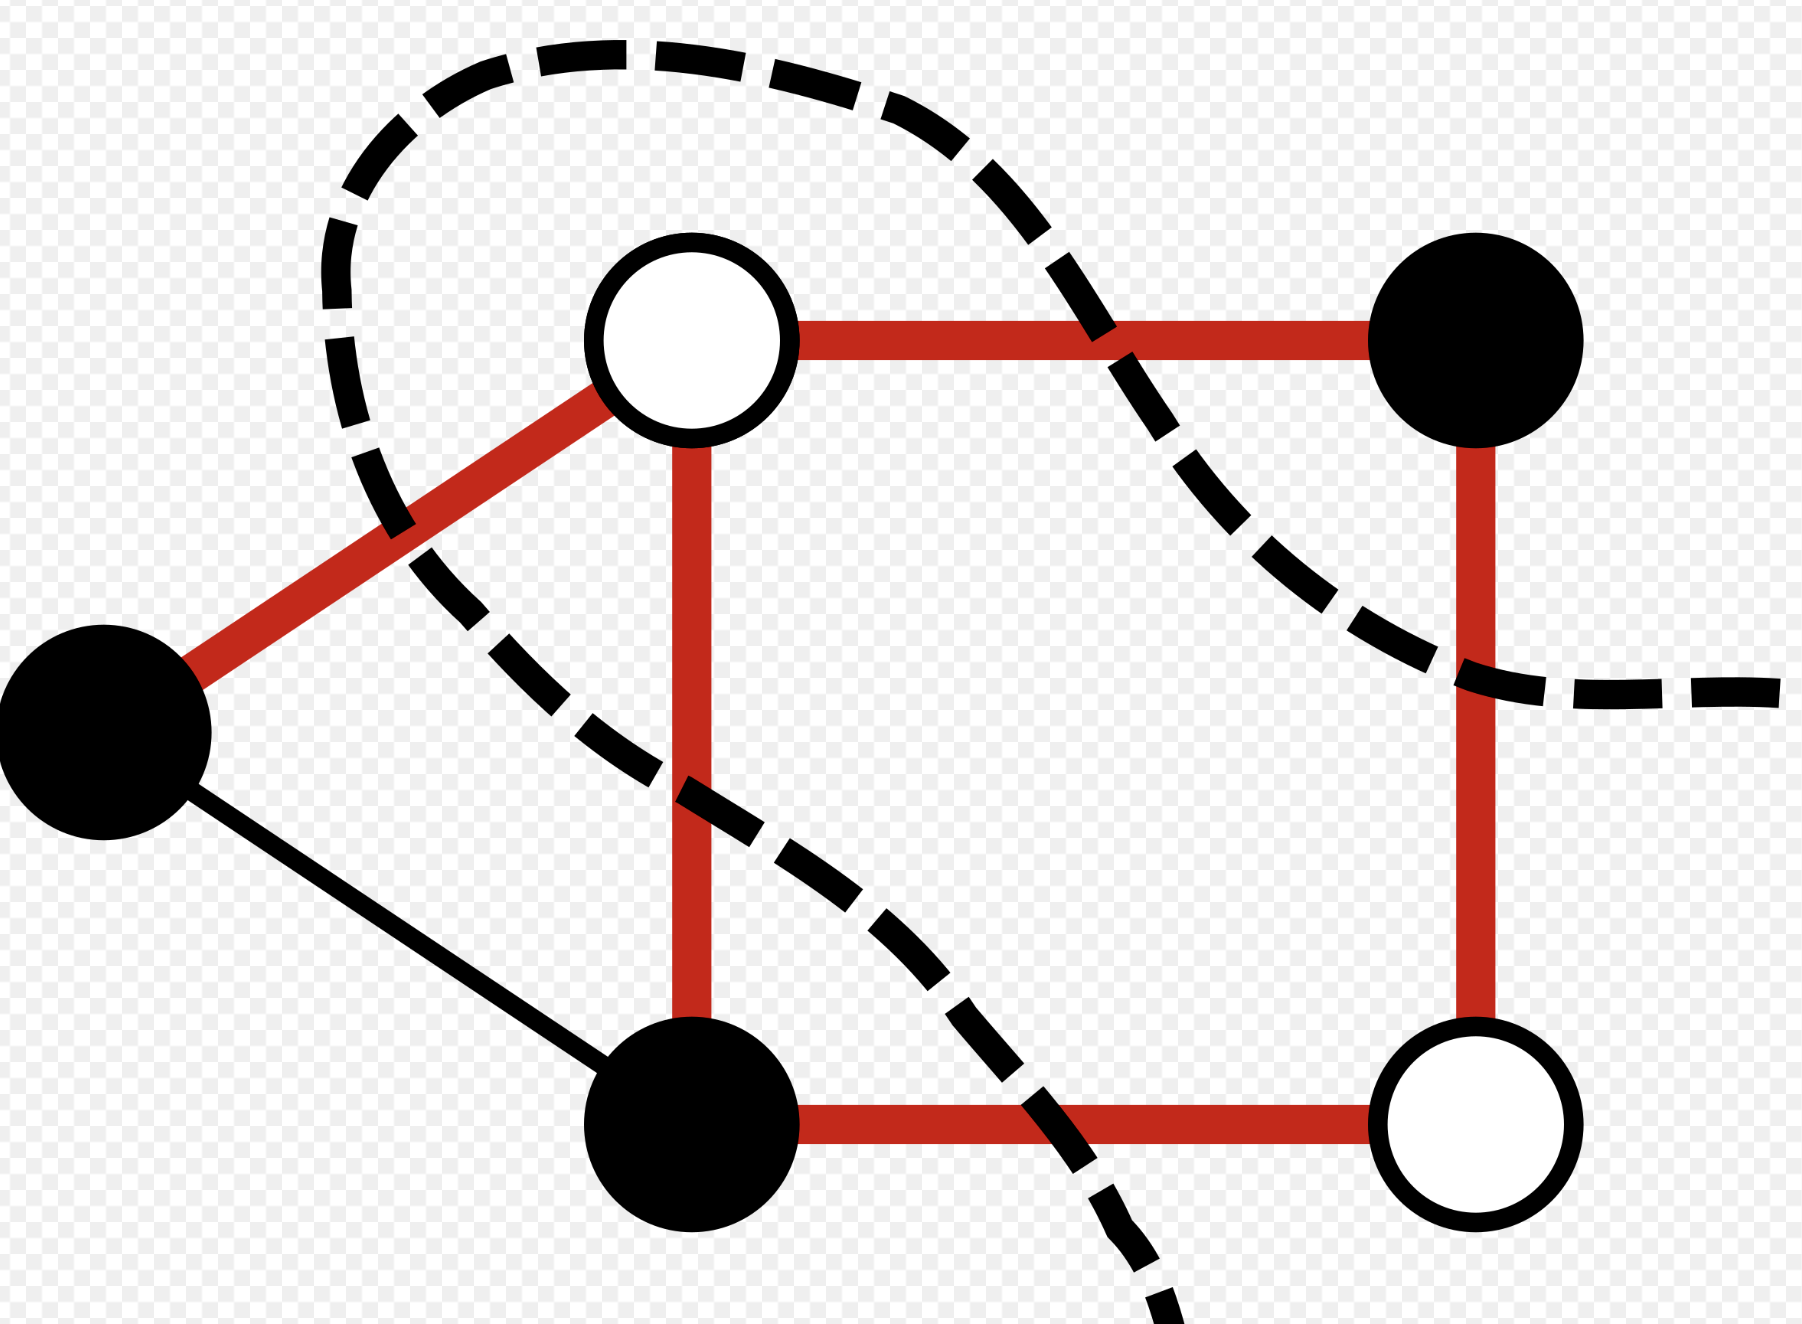

In [9]:
from IPython.display import Image
Image(filename='/Users/seitzdom/Downloads/maxcut.png')

Let's run extremal-learning using adjoint! 

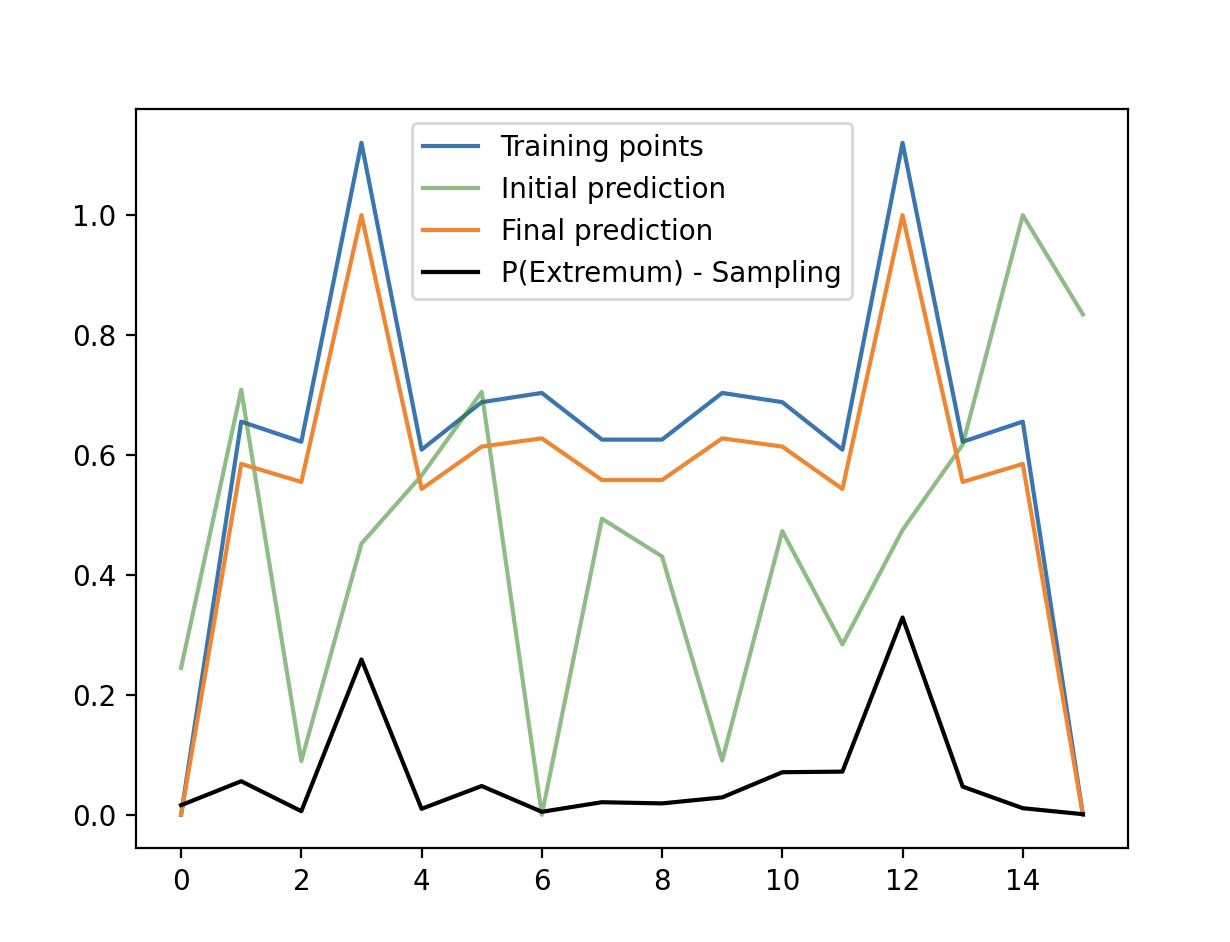

In [10]:
from IPython.display import Image
Image(filename='/Users/seitzdom/Downloads/el_adjoint.png')


Most sampled bitstring(s) using optimal extremizer values: ['1100']
True extrema are ['1100', '0011']
Sum of discovered extrema probabilities is 0.588

How much memory does it actually save?

In [11]:
import torch
from qadence import QuantumModel

def _model_expectation(
    diff_mode: DiffMode,
    n_qubits: int,
    depth: int,
    batch_size: int,
) -> None:
    model = QuantumModel(
        QuantumCircuit(n_qubits, hea(n_qubits, depth)),
        observable=total_magnetization(n_qubits),
        backend='pyqtorch',
        diff_mode=diff_mode,
    )
    expvals = model.expectation({})
    model.zero_grad()
    loss = torch.mean(expvals)
    loss.backward()

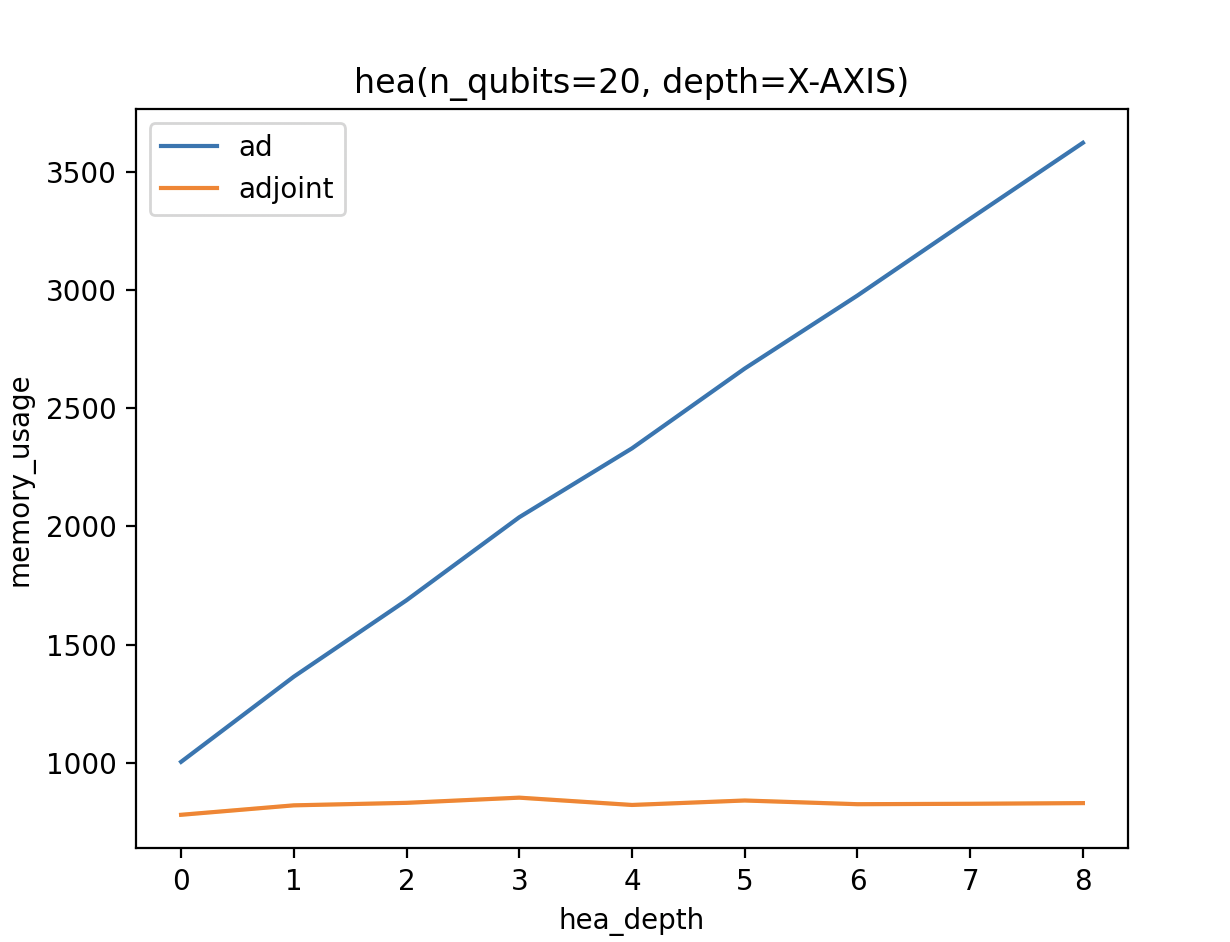

In [12]:
from IPython.display import Image
Image(filename='/Users/seitzdom/Downloads/ad_adjoint_memory.png')

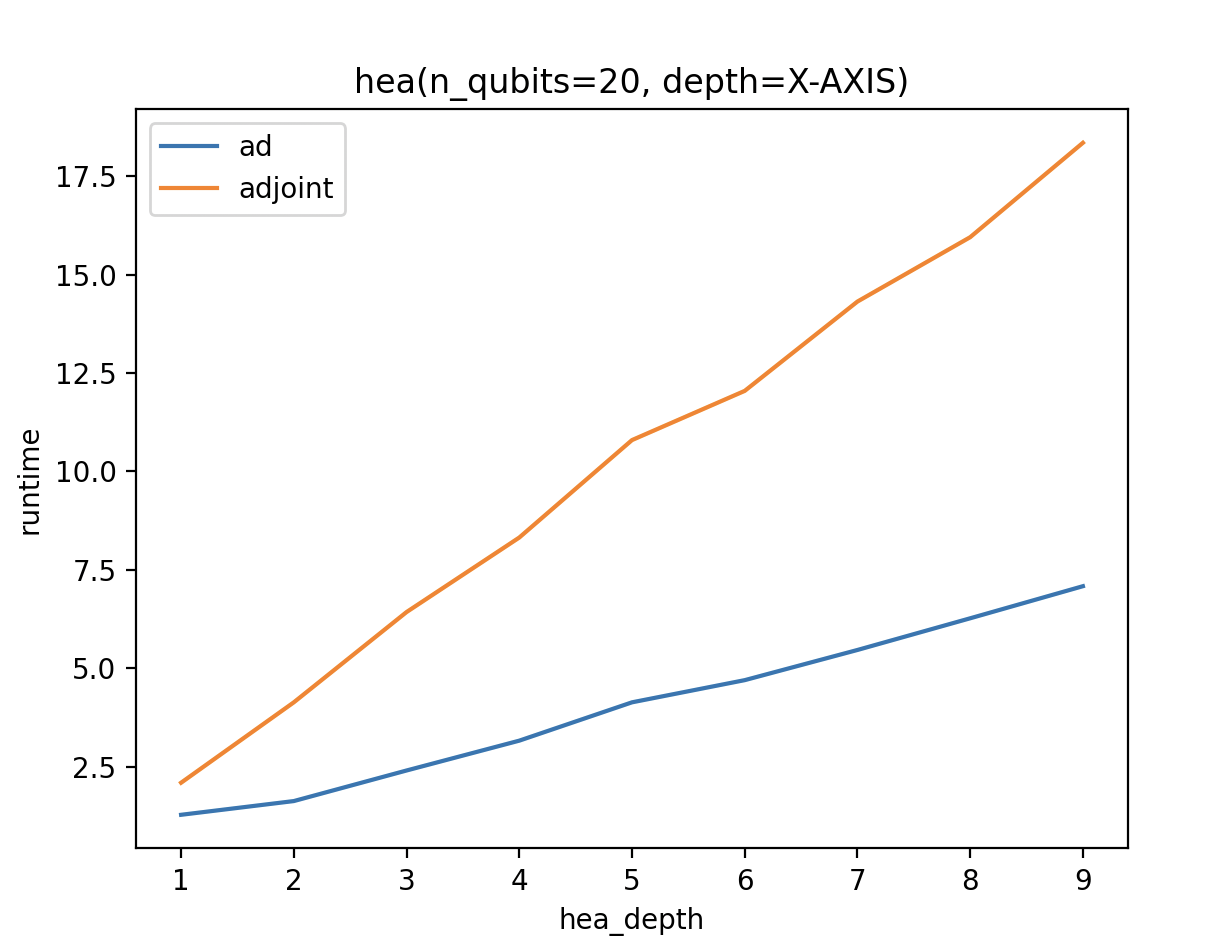

In [13]:
from IPython.display import Image
Image(filename='/Users/seitzdom/Downloads/ad_adjoint_runtime.png')

Main take-aways:

- Memory consumption ONLY scales with the number of qubits NOT with the number of parameters in the circuit

- Adjoint is work in progress to the current lacking features like higher order/ multiple observables will soon be supported.